# Descriptive Statistics Problems

## Notebook set-up

Import core libraries, set up helper function, and prepare plotting.

In [1]:
# Import libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Helper to add title length features
from functions import add_title_length_features

## Data loading

Load the IMDb dataset and add a `title_length` column using the helper function to avoid mutating the original dataframe.

In [2]:
# Load IMDb dataset and compute title length
url = "../data/imdb_1000.csv"
df_raw = pd.read_csv(url)

## Exercise 1 – How long are movie titles?

In this exercise, you will apply descriptive statistics techniques to a real dataset: a database of 1000 popular movies from the IMDb website.

From the title of each movie, you will:
- Calculate the title length (in characters).
- Obtain key statistical metrics: mean, median, mode, range, variance, standard deviation, skewness, and kurtosis.
- Identify the longest and shortest titles.
- Visualize the distribution of these lengths with a histogram and a density curve.

### 1.1. Create Title Length Column

Build a focused dataframe with movie `title` and computed `title_length` for later analysis.

In [3]:
# Add title length feature safely (doesn't mutate original)
df = add_title_length_features(df_raw, title_column='title', length_column='title_length')

# Create a new dataframe with only title and its length
# Keep it small and focused for subsequent stats
titles = df[["title", "title_length"]].copy()

# Show a sample
titles.head()

,title,title_length
0,The Shawshank Redemption,24
1,The Godfather,13
2,The Godfather: Part II,22
3,The Dark Knight,15
4,Pulp Fiction,12


### 1.2. Central tendency measures

Compute mean, median, and mode for title lengths.

In [4]:
# Central tendency: mean, median, mode for title length
lengths = titles["title_length"]
mean_len = lengths.mean()
median_len = lengths.median()

mode_result = mode(lengths, keepdims=True)
mode_len = int(mode_result.mode[0]) if len(mode_result.mode) else None

print(f"Mean title length: {mean_len:.2f}")
print(f"Median title length: {median_len}")
print(f"Mode title length: {mode_len}")

Mean title length: 15.48
Median title length: 14.0
Mode title length: 12


### 1.3. Measures of spread

Compute range, variance, and standard deviation (population, ddof=0) for title lengths.

In [5]:
# Spread: range, variance, standard deviation
range_len = lengths.max() - lengths.min()
var_len = lengths.var()
std_len = lengths.std()

print(f"Range: {range_len}")
print(f"Variance: {var_len:.2f}")
print(f"Std Dev: {std_len:.2f}")

Range: 67
Variance: 72.11
Std Dev: 8.49


### 1.4. Measure of shape

Compute skewness and kurtosis (excess) to understand distribution shape.

In [6]:
# Shape: skewness and kurtosis
skewness = skew(lengths)
kurt = kurtosis(lengths)

print(f"Skewness: {skewness:.3f}")
print(f"Kurtosis: {kurt:.3f}")

Skewness: 1.523
Kurtosis: 3.787


### 1.5. Extreme Values

Find shortest and longest titles based on character count.

In [7]:
# Extreme values: shortest and longest titles
min_len = lengths.min()
max_len = lengths.max()

shortest = titles[titles["title_length"] == min_len]["title"].tolist()
longest = titles[titles["title_length"] == max_len]["title"].tolist()

print(f"Shortest length: {min_len} -> {shortest}")
print(f"Longest length: {max_len} -> {longest}")

Shortest length: 1 -> ['M']
Longest length: 68 -> ['Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb']


### 1.6. Visualization and Summary

Plot a histogram with a KDE curve to visualize the distribution of title lengths.

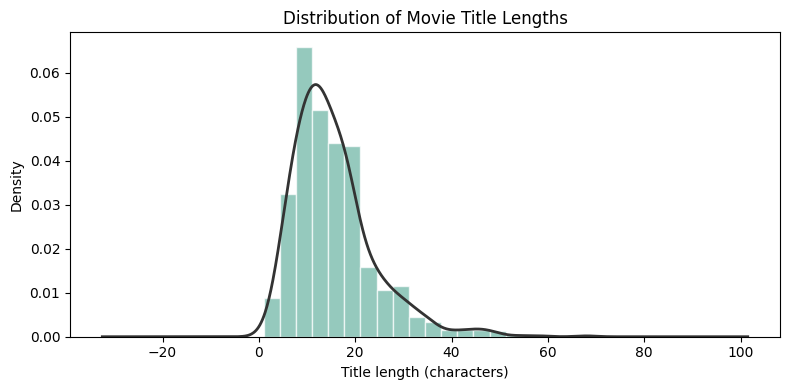

In [8]:
# Visualization: histogram with density curve
plt.figure(figsize=(8,4))
ax = plt.gca()
# Histogram
n, bins, patches = ax.hist(lengths, bins=20, color="#69b3a2", alpha=0.7, density=True, edgecolor="white")

# Overlay KDE on same axes
lengths.plot(kind='kde', color='#333333', linewidth=2, ax=ax)

ax.set_title("Distribution of Movie Title Lengths")
ax.set_xlabel("Title length (characters)")
ax.set_ylabel("Density")
plt.tight_layout()
plt.show()

---

## Exercise 2 – Manual Calculation of Standard Deviation

In this exercise, you will manually calculate the standard deviation by selecting five actual titles from the movie dataset you loaded earlier.


In [9]:
# Create a list with 5 actual values from df['title_length'], for example: [10, 13, 14, 18, 22]
# First, let's look at some sample title lengths from our dataset
print("Sample of title lengths from the dataset:")
sample_titles = df[['title', 'title_length']].head(10)
print(sample_titles)

# Select 5 specific title length values from our dataset
sample_lengths = [df['title_length'].iloc[0], df['title_length'].iloc[1], 
                 df['title_length'].iloc[2], df['title_length'].iloc[3], 
                 df['title_length'].iloc[4]]

print(f"\nSelected 5 title lengths for manual calculation: {sample_lengths}")

Sample of title lengths from the dataset:
                                           title  title_length
0                       The Shawshank Redemption            24
1                                  The Godfather            13
2                         The Godfather: Part II            22
3                                The Dark Knight            15
4                                   Pulp Fiction            12
5                                   12 Angry Men            12
6                 The Good, the Bad and the Ugly            30
7  The Lord of the Rings: The Return of the King            45
8                               Schindler's List            16
9                                     Fight Club            10

Selected 5 title lengths for manual calculation: [np.int64(24), np.int64(13), np.int64(22), np.int64(15), np.int64(12)]


### 2.1. Sample mean

Compute the arithmetic mean of the selected five title lengths.

In [10]:
# Calculate the mean of the 5 values
# Mean = sum of all values divided by the number of values
sample_mean = sum(sample_lengths) / len(sample_lengths)

print(f"Values: {sample_lengths}")
print(f"Sum of values: {sum(sample_lengths)}")
print(f"Number of values: {len(sample_lengths)}")
print(f"Mean = {sum(sample_lengths)} / {len(sample_lengths)} = {sample_mean:.2f}")

Values: [np.int64(24), np.int64(13), np.int64(22), np.int64(15), np.int64(12)]
Sum of values: 86
Number of values: 5
Mean = 86 / 5 = 17.20


### 2.2. Calculate Squared Differences

For each value, compute (value − mean)² to measure dispersion from the mean.

In [11]:
# Calculate the squared differences with respect to the mean
# For each value, calculate: (value - mean)²
squared_differences = []

print("Calculating squared differences:")
print(f"Mean = {sample_mean:.2f}")
print()

for i, value in enumerate(sample_lengths):
    difference = value - sample_mean
    squared_diff = difference ** 2
    squared_differences.append(squared_diff)
    print(f"Value {i+1}: {value}")
    print(f"  Difference from mean: {value} - {sample_mean:.2f} = {difference:.2f}")
    print(f"  Squared difference: ({difference:.2f})² = {squared_diff:.2f}")
    print()

print(f"Squared differences: {[round(float(x), 2) for x in squared_differences]}")
print(f"Sum of squared differences: {sum(squared_differences):.2f}")

Calculating squared differences:
Mean = 17.20

Value 1: 24
  Difference from mean: 24 - 17.20 = 6.80
  Squared difference: (6.80)² = 46.24

Value 2: 13
  Difference from mean: 13 - 17.20 = -4.20
  Squared difference: (-4.20)² = 17.64

Value 3: 22
  Difference from mean: 22 - 17.20 = 4.80
  Squared difference: (4.80)² = 23.04

Value 4: 15
  Difference from mean: 15 - 17.20 = -2.20
  Squared difference: (-2.20)² = 4.84

Value 5: 12
  Difference from mean: 12 - 17.20 = -5.20
  Squared difference: (-5.20)² = 27.04

Squared differences: [46.24, 17.64, 23.04, 4.84, 27.04]
Sum of squared differences: 118.80


### 2.3. Variance and Standard Deviation

Average the squared differences to get variance, then take the square root for standard deviation.

In [12]:
# Calculate the variance (average of the squared differences) and its square root to obtain the standard deviation
# Variance = sum of squared differences / number of values
# Standard deviation = square root of variance

# Calculate variance
variance = sum(squared_differences) / len(squared_differences)

# Calculate standard deviation
std_deviation = math.sqrt(variance)

print("MANUAL STANDARD DEVIATION CALCULATION:")
print(f"Sum of squared differences: {sum(squared_differences):.2f}")
print(f"Number of values: {len(squared_differences)}")
print(f"Variance = {sum(squared_differences):.2f} / {len(squared_differences)} = {variance:.2f}")
print(f"Standard deviation = √{variance:.2f} = {std_deviation:.2f}")

print("\nVERIFICATION:")
print(f"Manual calculation: {std_deviation:.2f}")
print(f"NumPy calculation: {np.std(sample_lengths):.2f}")
print(f"Pandas calculation: {pd.Series(sample_lengths).std():.2f}")

# Note: Pandas uses sample standard deviation (n-1) by default, NumPy uses population std (n)
print(f"\nNote: Small differences may occur due to sample vs population standard deviation formulas")

MANUAL STANDARD DEVIATION CALCULATION:
Sum of squared differences: 118.80
Number of values: 5
Variance = 118.80 / 5 = 23.76
Standard deviation = √23.76 = 4.87

VERIFICATION:
Manual calculation: 4.87
NumPy calculation: 4.87
Pandas calculation: 5.45

Note: Small differences may occur due to sample vs population standard deviation formulas
